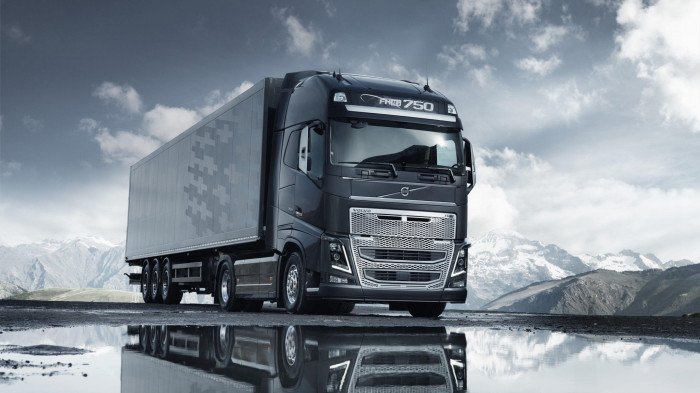

In [ ]:
# Inferência

from PIL import Image
import requests

url = 'https://wallpapercave.com/dwp1x/wc1682508.jpg'
image = Image.open(requests.get(url,stream=True).raw)
image

In [ ]:
!pip install -q datasets transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.6 MB/s eta 0:00:00


In [ ]:
# Carregar o processor e o modelo via huggingface

from transformers import AutoModelForImageClassification, AutoImageProcessor

repo_name = "ahirtonlopes/swin-tiny-patch4-window7-224-finetuned-cifar10"

image_processor = AutoImageProcessor.from_pretrained(repo_name)
model = AutoModelForImageClassification.from_pretrained(repo_name)

In [ ]:
# Preparar as imagens pra inferência

encoding = image_processor(image.convert("RGB"), return_tensors="pt")
print(encoding.pixel_values.shape)

torch.Size([1, 3, 224, 224])


In [ ]:
import torch

with torch.no_grad():
  outputs = model(**encoding)
  logits = outputs.logits

In [ ]:
predicted_class_idx = logits.argmax(-1).item()
print("Classe predita:", model.config.id2label[predicted_class_idx])

Classe predita: truck


In [ ]:
# Criando uma Pipeline API para um problema de classificação de imagem

from transformers import pipeline

pipe = pipeline("image-classification", "ahirtonlopes/swin-tiny-patch4-window7-224-finetuned-cifar10")

In [ ]:
pipe(image)

[{'score': 0.9344207644462585, 'label': 'truck'},
 {'score': 0.014897380024194717, 'label': 'automobile'},
 {'score': 0.01087227277457714, 'label': 'dog'},
 {'score': 0.010023556649684906, 'label': 'ship'},
 {'score': 0.007270106580108404, 'label': 'bird'}]

In [ ]:
pipe = pipeline("image-classification",
                "ahirtonlopes/swin-tiny-patch4-window7-224-finetuned-cifar10",
                feature_extractor=image_processor)

In [ ]:
pipe(image)

[{'score': 0.9344207644462585, 'label': 'truck'},
 {'score': 0.014897380024194717, 'label': 'automobile'},
 {'score': 0.01087227277457714, 'label': 'dog'},
 {'score': 0.010023556649684906, 'label': 'ship'},
 {'score': 0.007270106580108404, 'label': 'bird'}]